In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
N = 100
x_zeros = np.random.multivariate_normal(
mean=np.array((-1,-1)), cov=.1*np.eye(2), size=(int(N/2),))
y_zeros = np.zeros((int(N/2),))
x_ones = np.random.multivariate_normal(
mean=np.array((1,1)), cov=.1*np.eye(2), size=(int(N/2),))
y_ones = np.ones((int(N/2),))

x_np = np.vstack([x_zeros, x_ones])
y_np = np.concatenate([y_zeros, y_ones])



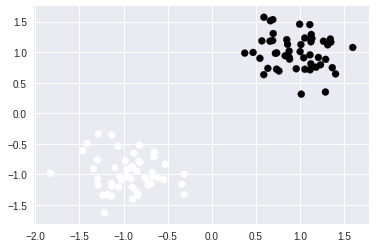

In [3]:
plt.scatter(x_np[:,0], x_np[:,1], c=y_np)

In [0]:
with tf.name_scope('placeholders'):
  x = tf.placeholder(tf.float32, (N,2))
  y = tf.placeholder(tf.float32, (N,))
  
with tf.name_scope('wheights'):
  W = tf.Variable(tf.random_normal((2,1)))
  b = tf.Variable(tf.random_normal((1,)))
  
with tf.name_scope('prediction'):
  y_logit = tf.squeeze(tf.matmul(x,W)+b)
  y_one_prob = tf.sigmoid(y_logit)
  y_pred = tf.round(y_one_prob)
  
with tf.name_scope('loss'):
  entropy = tf.nn.sigmoid_cross_entropy_with_logits(logits = y_logit, labels=y)
  l = tf.reduce_sum(entropy)
  
with tf.name_scope('optim'):
  train_op = tf.train.AdadeltaOptimizer(.01).minimize(l)
  
  


In [0]:
n_steps = 40000
losses = []
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  feed_dict = {x:x_np, y:y_np}
  for i in range(n_steps):
    _, loss = sess.run([train_op, l], feed_dict=feed_dict)
    losses.append(loss)
  predictions = sess.run(y_pred, feed_dict=feed_dict)

    

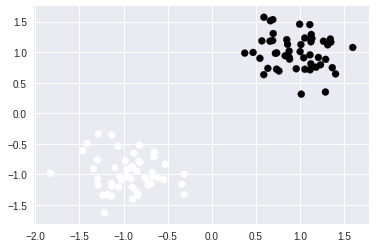

In [14]:
plt.scatter(x_np[:,0], x_np[:,1], c=predictions)

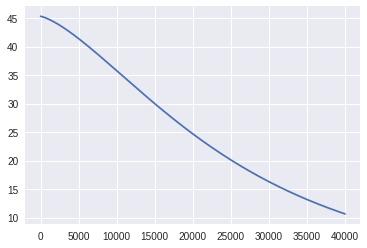

In [15]:
plt.plot(range(n_steps),losses )